# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
opitimizers = ['Adam', 'Adagrad', 'SGD', 'RMSprop']

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, op in itertools.product(LEARNING_RATE, opitimizers):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, opitimizer = %s" % (lr, str(op)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=op)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-opitimizer-%s" % (str(lr), str(op))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000, Momentum = Adam
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 8s 42ms/s

196/196 [==============================] - 7s 35ms/step - loss: 0.6369 - accuracy: 0.7721 - val_loss: 1.7561 - val_accuracy: 0.5227
Experiment with LR = 0.100000, Momentum = Adagrad
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable para

196/196 [==============================] - 7s 34ms/step - loss: 1.5109 - accuracy: 0.4739 - val_loss: 1.5376 - val_accuracy: 0.4640
Epoch 50/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5071 - accuracy: 0.4747 - val_loss: 1.5349 - val_accuracy: 0.4594
Experiment with LR = 0.100000, Momentum = SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________________________________

196/196 [==============================] - 6s 30ms/step - loss: 1.2428 - accuracy: 0.5650 - val_loss: 1.3750 - val_accuracy: 0.5095
Epoch 49/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2374 - accuracy: 0.5667 - val_loss: 1.5554 - val_accuracy: 0.4622
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2357 - accuracy: 0.5666 - val_loss: 1.4349 - val_accuracy: 0.5005
Experiment with LR = 0.100000, Momentum = RMSprop
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________

196/196 [==============================] - 10s 53ms/step - loss: 0.8115 - accuracy: 0.7093 - val_loss: 2.0753 - val_accuracy: 0.4523
Epoch 48/50
196/196 [==============================] - 10s 52ms/step - loss: 0.8055 - accuracy: 0.7110 - val_loss: 2.0845 - val_accuracy: 0.4640
Epoch 49/50
196/196 [==============================] - 10s 52ms/step - loss: 0.7918 - accuracy: 0.7162 - val_loss: 2.1740 - val_accuracy: 0.4364
Epoch 50/50
196/196 [==============================] - 10s 52ms/step - loss: 0.7823 - accuracy: 0.7194 - val_loss: 1.8312 - val_accuracy: 0.4896
Experiment with LR = 0.010000, Momentum = Adam
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________

196/196 [==============================] - 7s 36ms/step - loss: 0.6752 - accuracy: 0.7567 - val_loss: 1.7556 - val_accuracy: 0.5215
Epoch 47/50
196/196 [==============================] - 7s 36ms/step - loss: 0.6636 - accuracy: 0.7587 - val_loss: 1.7258 - val_accuracy: 0.5227
Epoch 48/50
196/196 [==============================] - 7s 35ms/step - loss: 0.6452 - accuracy: 0.7669 - val_loss: 1.8266 - val_accuracy: 0.5185
Epoch 49/50
196/196 [==============================] - 7s 35ms/step - loss: 0.6414 - accuracy: 0.7705 - val_loss: 1.8580 - val_accuracy: 0.5093
Epoch 50/50
196/196 [==============================] - 7s 35ms/step - loss: 0.6394 - accuracy: 0.7697 - val_loss: 1.8586 - val_accuracy: 0.5126
Experiment with LR = 0.010000, Momentum = Adagrad
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________

196/196 [==============================] - 10s 51ms/step - loss: 1.5386 - accuracy: 0.4658 - val_loss: 1.5666 - val_accuracy: 0.4549
Epoch 46/50
196/196 [==============================] - 10s 50ms/step - loss: 1.5344 - accuracy: 0.4665 - val_loss: 1.5680 - val_accuracy: 0.4484
Epoch 47/50
196/196 [==============================] - 8s 39ms/step - loss: 1.5309 - accuracy: 0.4688 - val_loss: 1.5565 - val_accuracy: 0.4546
Epoch 48/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5271 - accuracy: 0.4691 - val_loss: 1.5507 - val_accuracy: 0.4559
Epoch 49/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5229 - accuracy: 0.4710 - val_loss: 1.5497 - val_accuracy: 0.4558
Epoch 50/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5198 - accuracy: 0.4728 - val_loss: 1.5482 - val_accuracy: 0.4569
Experiment with LR = 0.010000, Momentum = SGD
Model: "functional_1"
_________________________________________________________________
Layer (type)

196/196 [==============================] - 9s 45ms/step - loss: 1.2803 - accuracy: 0.5501 - val_loss: 1.5468 - val_accuracy: 0.4607
Epoch 45/50
196/196 [==============================] - 9s 45ms/step - loss: 1.2708 - accuracy: 0.5529 - val_loss: 1.5080 - val_accuracy: 0.4645
Epoch 46/50
196/196 [==============================] - 9s 45ms/step - loss: 1.2629 - accuracy: 0.5547 - val_loss: 1.3887 - val_accuracy: 0.5012
Epoch 47/50
196/196 [==============================] - 8s 40ms/step - loss: 1.2594 - accuracy: 0.5589 - val_loss: 1.4134 - val_accuracy: 0.5006
Epoch 48/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2529 - accuracy: 0.5591 - val_loss: 1.6066 - val_accuracy: 0.4325
Epoch 49/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2447 - accuracy: 0.5647 - val_loss: 1.4127 - val_accuracy: 0.5003
Epoch 50/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2334 - accuracy: 0.5672 - val_loss: 1.3932 - val_accuracy: 0.5077
Expe

196/196 [==============================] - 10s 53ms/step - loss: 0.8484 - accuracy: 0.6962 - val_loss: 1.8728 - val_accuracy: 0.4826
Epoch 44/50
196/196 [==============================] - 10s 52ms/step - loss: 0.8349 - accuracy: 0.7019 - val_loss: 1.8930 - val_accuracy: 0.4804
Epoch 45/50
196/196 [==============================] - 10s 52ms/step - loss: 0.8285 - accuracy: 0.7037 - val_loss: 1.8770 - val_accuracy: 0.4837
Epoch 46/50
196/196 [==============================] - 10s 53ms/step - loss: 0.8099 - accuracy: 0.7099 - val_loss: 1.8601 - val_accuracy: 0.4809
Epoch 47/50
196/196 [==============================] - 10s 52ms/step - loss: 0.7997 - accuracy: 0.7112 - val_loss: 1.8136 - val_accuracy: 0.4909
Epoch 48/50
196/196 [==============================] - 10s 53ms/step - loss: 0.7927 - accuracy: 0.7156 - val_loss: 1.9268 - val_accuracy: 0.4719
Epoch 49/50
196/196 [==============================] - 10s 52ms/step - loss: 0.7777 - accuracy: 0.7220 - val_loss: 2.0085 - val_accuracy: 0.47

196/196 [==============================] - 7s 36ms/step - loss: 0.7392 - accuracy: 0.7372 - val_loss: 1.6229 - val_accuracy: 0.5183
Epoch 43/50
196/196 [==============================] - 7s 36ms/step - loss: 0.7409 - accuracy: 0.7356 - val_loss: 1.6477 - val_accuracy: 0.5143
Epoch 44/50
196/196 [==============================] - 7s 37ms/step - loss: 0.7150 - accuracy: 0.7452 - val_loss: 1.6514 - val_accuracy: 0.5157
Epoch 45/50
196/196 [==============================] - 7s 37ms/step - loss: 0.6899 - accuracy: 0.7534 - val_loss: 1.6961 - val_accuracy: 0.5143
Epoch 46/50
196/196 [==============================] - 7s 37ms/step - loss: 0.6786 - accuracy: 0.7584 - val_loss: 1.7330 - val_accuracy: 0.5163
Epoch 47/50
196/196 [==============================] - 7s 37ms/step - loss: 0.6740 - accuracy: 0.7594 - val_loss: 1.7082 - val_accuracy: 0.5189
Epoch 48/50
196/196 [==============================] - 7s 38ms/step - loss: 0.6531 - accuracy: 0.7640 - val_loss: 1.7686 - val_accuracy: 0.5118
Epoc

196/196 [==============================] - 10s 49ms/step - loss: 1.5404 - accuracy: 0.4636 - val_loss: 1.5687 - val_accuracy: 0.4497
Epoch 42/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5351 - accuracy: 0.4653 - val_loss: 1.5579 - val_accuracy: 0.4524
Epoch 43/50
196/196 [==============================] - 7s 35ms/step - loss: 1.5315 - accuracy: 0.4654 - val_loss: 1.5785 - val_accuracy: 0.4428
Epoch 44/50
196/196 [==============================] - 7s 35ms/step - loss: 1.5275 - accuracy: 0.4684 - val_loss: 1.5483 - val_accuracy: 0.4565
Epoch 45/50
196/196 [==============================] - 7s 35ms/step - loss: 1.5240 - accuracy: 0.4688 - val_loss: 1.5523 - val_accuracy: 0.4540
Epoch 46/50
196/196 [==============================] - 7s 35ms/step - loss: 1.5199 - accuracy: 0.4709 - val_loss: 1.5403 - val_accuracy: 0.4601
Epoch 47/50
196/196 [==============================] - 7s 35ms/step - loss: 1.5164 - accuracy: 0.4725 - val_loss: 1.5504 - val_accuracy: 0.4572
Epo

196/196 [==============================] - 6s 31ms/step - loss: 1.2899 - accuracy: 0.5462 - val_loss: 1.4045 - val_accuracy: 0.4941
Epoch 41/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2811 - accuracy: 0.5503 - val_loss: 1.5959 - val_accuracy: 0.4406
Epoch 42/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2720 - accuracy: 0.5536 - val_loss: 1.4957 - val_accuracy: 0.4750
Epoch 43/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2736 - accuracy: 0.5526 - val_loss: 1.3959 - val_accuracy: 0.5025
Epoch 44/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2642 - accuracy: 0.5554 - val_loss: 1.4199 - val_accuracy: 0.4880
Epoch 45/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2555 - accuracy: 0.5569 - val_loss: 1.4536 - val_accuracy: 0.4814
Epoch 46/50
196/196 [==============================] - 6s 32ms/step - loss: 1.2502 - accuracy: 0.5604 - val_loss: 1.3664 - val_accuracy: 0.5110
Epoc

196/196 [==============================] - 10s 53ms/step - loss: 0.8935 - accuracy: 0.6805 - val_loss: 1.8453 - val_accuracy: 0.4712
Epoch 40/50
196/196 [==============================] - 10s 53ms/step - loss: 0.8828 - accuracy: 0.6823 - val_loss: 1.7295 - val_accuracy: 0.4988
Epoch 41/50
196/196 [==============================] - 10s 53ms/step - loss: 0.8611 - accuracy: 0.6912 - val_loss: 1.9256 - val_accuracy: 0.4559
Epoch 42/50
196/196 [==============================] - 10s 52ms/step - loss: 0.8517 - accuracy: 0.6962 - val_loss: 1.7645 - val_accuracy: 0.4884
Epoch 43/50
196/196 [==============================] - 10s 52ms/step - loss: 0.8398 - accuracy: 0.6997 - val_loss: 1.7181 - val_accuracy: 0.4950
Epoch 44/50
196/196 [==============================] - 10s 53ms/step - loss: 0.8313 - accuracy: 0.7035 - val_loss: 1.8153 - val_accuracy: 0.4890
Epoch 45/50
196/196 [==============================] - 10s 52ms/step - loss: 0.8151 - accuracy: 0.7067 - val_loss: 1.8528 - val_accuracy: 0.48

Epoch 37/50
196/196 [==============================] - 7s 35ms/step - loss: 0.8469 - accuracy: 0.6966 - val_loss: 1.5181 - val_accuracy: 0.5195
Epoch 38/50
196/196 [==============================] - 7s 35ms/step - loss: 0.8318 - accuracy: 0.7042 - val_loss: 1.5057 - val_accuracy: 0.5277
Epoch 39/50
196/196 [==============================] - 7s 35ms/step - loss: 0.8121 - accuracy: 0.7111 - val_loss: 1.5318 - val_accuracy: 0.5203
Epoch 40/50
196/196 [==============================] - 7s 36ms/step - loss: 0.7874 - accuracy: 0.7184 - val_loss: 1.5955 - val_accuracy: 0.5133
Epoch 41/50
196/196 [==============================] - 7s 36ms/step - loss: 0.7773 - accuracy: 0.7225 - val_loss: 1.6127 - val_accuracy: 0.5133
Epoch 42/50
196/196 [==============================] - 7s 36ms/step - loss: 0.7556 - accuracy: 0.7306 - val_loss: 1.6271 - val_accuracy: 0.5158
Epoch 43/50
196/196 [==============================] - 7s 36ms/step - loss: 0.7553 - accuracy: 0.7301 - val_loss: 1.7243 - val_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 1.5625 - accuracy: 0.4571 - val_loss: 1.5779 - val_accuracy: 0.4444
Epoch 37/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5580 - accuracy: 0.4586 - val_loss: 1.5854 - val_accuracy: 0.4392
Epoch 38/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5528 - accuracy: 0.4605 - val_loss: 1.5726 - val_accuracy: 0.4483
Epoch 39/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5484 - accuracy: 0.4624 - val_loss: 1.5666 - val_accuracy: 0.4503
Epoch 40/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5435 - accuracy: 0.4635 - val_loss: 1.5629 - val_accuracy: 0.4498
Epoch 41/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5392 - accuracy: 0.4654 - val_loss: 1.5630 - val_accuracy: 0.4536
Epoch 42/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5348 - accuracy: 0.4658 - val_loss: 1.5549 - val_accuracy: 0.4529
Epoc

196/196 [==============================] - 9s 46ms/step - loss: 1.3213 - accuracy: 0.5376 - val_loss: 1.5163 - val_accuracy: 0.4664
Epoch 36/50
196/196 [==============================] - 9s 45ms/step - loss: 1.3120 - accuracy: 0.5377 - val_loss: 1.3880 - val_accuracy: 0.5086
Epoch 37/50
196/196 [==============================] - 9s 45ms/step - loss: 1.3082 - accuracy: 0.5412 - val_loss: 1.5568 - val_accuracy: 0.4452
Epoch 38/50
196/196 [==============================] - 8s 40ms/step - loss: 1.3036 - accuracy: 0.5443 - val_loss: 1.4048 - val_accuracy: 0.4932
Epoch 39/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2913 - accuracy: 0.5472 - val_loss: 1.4465 - val_accuracy: 0.4857
Epoch 40/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2868 - accuracy: 0.5483 - val_loss: 1.4735 - val_accuracy: 0.4819
Epoch 41/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2790 - accuracy: 0.5528 - val_loss: 1.5491 - val_accuracy: 0.4537
Epoc

196/196 [==============================] - 10s 53ms/step - loss: 0.9860 - accuracy: 0.6451 - val_loss: 1.6854 - val_accuracy: 0.4920
Epoch 35/50
196/196 [==============================] - 10s 52ms/step - loss: 0.9686 - accuracy: 0.6536 - val_loss: 1.6612 - val_accuracy: 0.4884
Epoch 36/50
196/196 [==============================] - 10s 53ms/step - loss: 0.9503 - accuracy: 0.6602 - val_loss: 1.7728 - val_accuracy: 0.4682
Epoch 37/50
196/196 [==============================] - 10s 52ms/step - loss: 0.9386 - accuracy: 0.6641 - val_loss: 1.6395 - val_accuracy: 0.4899
Epoch 38/50
196/196 [==============================] - 10s 53ms/step - loss: 0.9249 - accuracy: 0.6683 - val_loss: 1.7322 - val_accuracy: 0.4841
Epoch 39/50
196/196 [==============================] - 10s 53ms/step - loss: 0.9056 - accuracy: 0.6770 - val_loss: 1.8135 - val_accuracy: 0.4716
Epoch 40/50
196/196 [==============================] - 10s 53ms/step - loss: 0.8963 - accuracy: 0.6808 - val_loss: 1.7211 - val_accuracy: 0.48

196/196 [==============================] - 7s 36ms/step - loss: 0.9211 - accuracy: 0.6719 - val_loss: 1.5069 - val_accuracy: 0.5134
Epoch 34/50
196/196 [==============================] - 7s 36ms/step - loss: 0.9085 - accuracy: 0.6758 - val_loss: 1.4757 - val_accuracy: 0.5237
Epoch 35/50
196/196 [==============================] - 7s 38ms/step - loss: 0.8876 - accuracy: 0.6821 - val_loss: 1.4980 - val_accuracy: 0.5108
Epoch 36/50
196/196 [==============================] - 7s 38ms/step - loss: 0.8694 - accuracy: 0.6892 - val_loss: 1.5388 - val_accuracy: 0.5116
Epoch 37/50
196/196 [==============================] - 7s 37ms/step - loss: 0.8556 - accuracy: 0.6942 - val_loss: 1.5066 - val_accuracy: 0.5230
Epoch 38/50
196/196 [==============================] - 7s 37ms/step - loss: 0.8417 - accuracy: 0.6990 - val_loss: 1.5314 - val_accuracy: 0.5229
Epoch 39/50
196/196 [==============================] - 7s 37ms/step - loss: 0.8275 - accuracy: 0.7043 - val_loss: 1.5763 - val_accuracy: 0.5235
Epoc

196/196 [==============================] - 7s 34ms/step - loss: 1.5829 - accuracy: 0.4469 - val_loss: 1.5956 - val_accuracy: 0.4370
Epoch 33/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5779 - accuracy: 0.4491 - val_loss: 1.5907 - val_accuracy: 0.4451
Epoch 34/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5726 - accuracy: 0.4506 - val_loss: 1.5886 - val_accuracy: 0.4450
Epoch 35/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5671 - accuracy: 0.4532 - val_loss: 1.5784 - val_accuracy: 0.4466
Epoch 36/50
196/196 [==============================] - 7s 34ms/step - loss: 1.5623 - accuracy: 0.4558 - val_loss: 1.5880 - val_accuracy: 0.4408
Epoch 37/50
196/196 [==============================] - 7s 35ms/step - loss: 1.5577 - accuracy: 0.4566 - val_loss: 1.5813 - val_accuracy: 0.4486
Epoch 38/50
196/196 [==============================] - 10s 50ms/step - loss: 1.5534 - accuracy: 0.4581 - val_loss: 1.5785 - val_accuracy: 0.4508
Epo

196/196 [==============================] - 9s 45ms/step - loss: 1.3642 - accuracy: 0.5214 - val_loss: 1.5366 - val_accuracy: 0.4490
Epoch 32/50
196/196 [==============================] - 9s 45ms/step - loss: 1.3554 - accuracy: 0.5267 - val_loss: 1.5021 - val_accuracy: 0.4640
Epoch 33/50
196/196 [==============================] - 8s 43ms/step - loss: 1.3471 - accuracy: 0.5270 - val_loss: 1.4483 - val_accuracy: 0.4817
Epoch 34/50
196/196 [==============================] - 8s 42ms/step - loss: 1.3387 - accuracy: 0.5299 - val_loss: 1.4157 - val_accuracy: 0.4932
Epoch 35/50
196/196 [==============================] - 9s 46ms/step - loss: 1.3263 - accuracy: 0.5355 - val_loss: 1.6078 - val_accuracy: 0.4286
Epoch 36/50
196/196 [==============================] - 9s 46ms/step - loss: 1.3231 - accuracy: 0.5371 - val_loss: 1.5150 - val_accuracy: 0.4656
Epoch 37/50
196/196 [==============================] - 9s 46ms/step - loss: 1.3154 - accuracy: 0.5380 - val_loss: 1.4024 - val_accuracy: 0.5019
Epoc

196/196 [==============================] - 11s 55ms/step - loss: 1.0557 - accuracy: 0.6223 - val_loss: 1.5402 - val_accuracy: 0.4955
Epoch 31/50
196/196 [==============================] - 11s 55ms/step - loss: 1.0387 - accuracy: 0.6300 - val_loss: 1.6394 - val_accuracy: 0.4675
Epoch 32/50
196/196 [==============================] - 11s 56ms/step - loss: 1.0215 - accuracy: 0.6328 - val_loss: 1.6089 - val_accuracy: 0.4812
Epoch 33/50
196/196 [==============================] - 11s 58ms/step - loss: 1.0048 - accuracy: 0.6384 - val_loss: 1.6060 - val_accuracy: 0.4769
Epoch 34/50
196/196 [==============================] - 12s 60ms/step - loss: 0.9877 - accuracy: 0.6449 - val_loss: 1.7247 - val_accuracy: 0.4708
Epoch 35/50
196/196 [==============================] - 11s 55ms/step - loss: 0.9764 - accuracy: 0.6487 - val_loss: 1.7369 - val_accuracy: 0.4677
Epoch 36/50
196/196 [==============================] - 11s 55ms/step - loss: 0.9623 - accuracy: 0.6568 - val_loss: 1.6746 - val_accuracy: 0.47

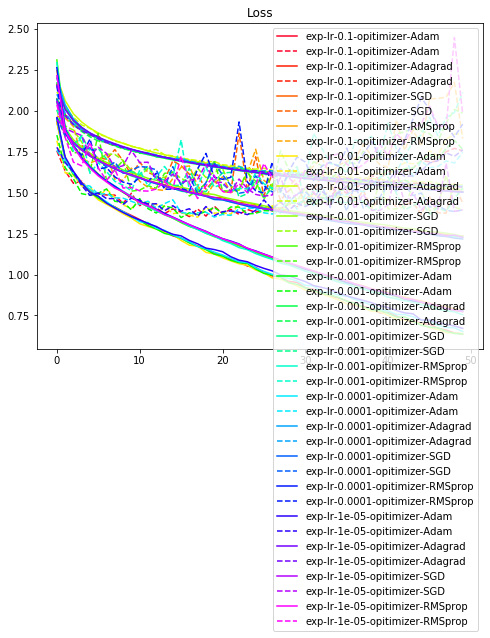

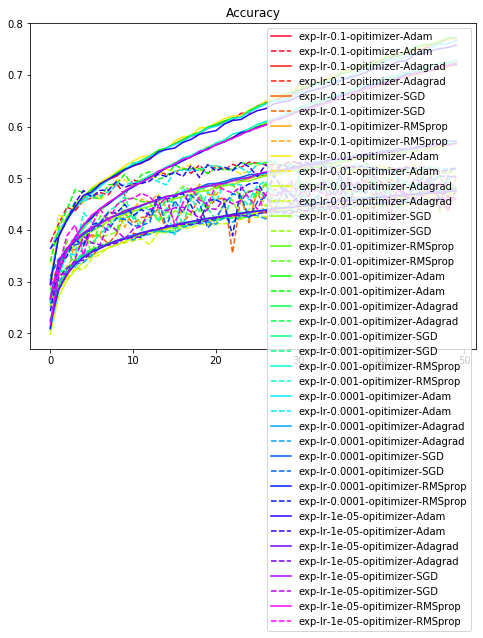

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()